In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# Read in the data
SA_DV = pd.read_csv (r'Big12_Sex_Dating_Offenses.csv')
# Rename the columns to years
SA_DV.rename(columns={'2020 Total':'2020', '2021 Total':'2021','2022 Total':'2022'}, inplace=True)
# Melt the three year columns into one year column
SA_DV_melt = SA_DV.melt(id_vars=['School','Offense'], var_name='Year', value_name='Count').drop_duplicates()
# Pivot the Offenses to Columns
SA_DV_pivot = SA_DV_melt.pivot(index = ['School','Year'], columns=('Offense'), values='Count').reset_index()
# Create a new column specifying whether the universities are private and religious
SA_DV_pivot['Religious'] = np.where(SA_DV_pivot['School'].isin(['BU','TCU','BYU']), True, False)

# Save the data to a csv
# SA_DV_pivot.to_csv('SexOffensePlotData.csv', index=False)

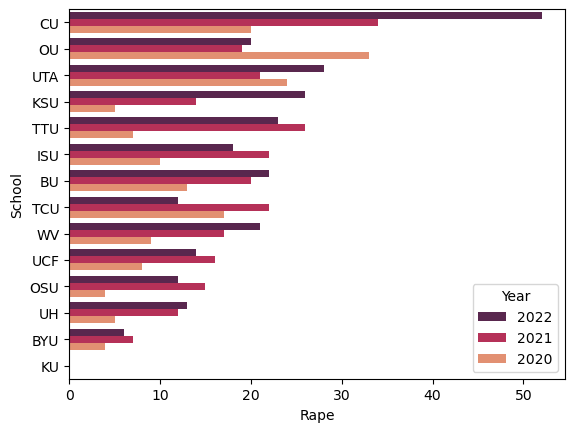

In [4]:
School_Rape = sns.barplot(x='Rape', y='School', data=SA_DV_pivot, hue='Year', palette='rocket', order=SA_DV_pivot.sort_values('Rape', ascending=False, inplace=True))
plt.show()
# Save plot as a png



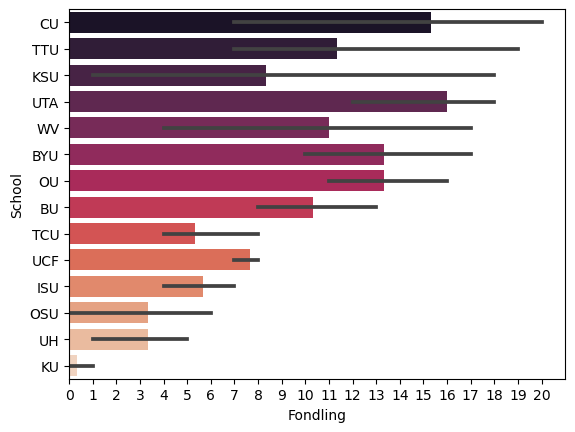

In [3]:
sns.barplot(x='Fondling', y='School', data=SA_DV_pivot, palette='rocket',order=SA_DV_pivot.sort_values('Fondling', ascending=False, inplace=True))
plt.xticks(np.arange(0, 21, 1))
plt.show()

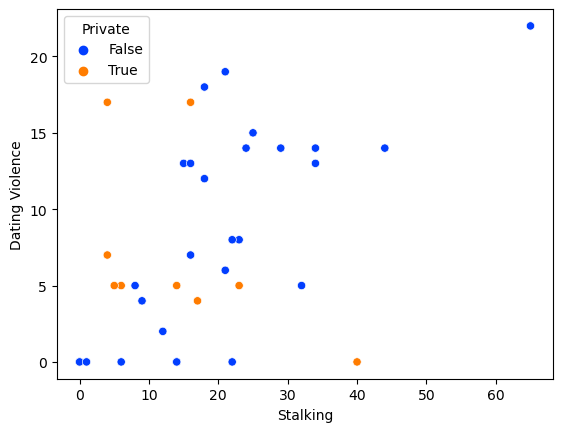

In [21]:
sns.scatterplot(x='Stalking', y='Dating Violence', data=SA_DV_pivot, hue='Private', palette='bright')
plt.show()
